In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data set
data=pd.read_csv('data.csv')
data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [3]:
data.shape

(2227, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [6]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

<AxesSubplot:>

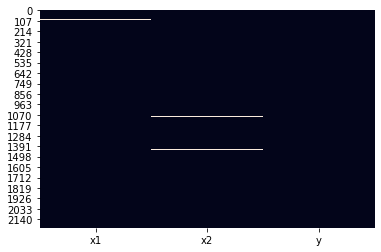

In [7]:
#heatmap of null value
sns.heatmap(data.isnull(),cbar=False)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

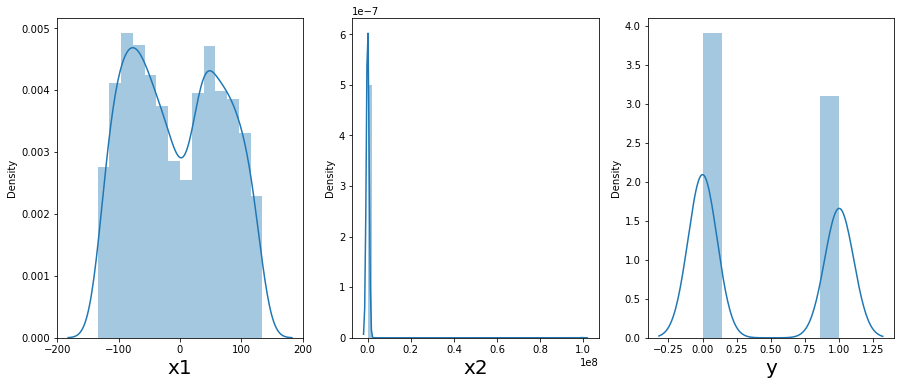

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=3 :     # as there are 3 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [9]:
#drop null value in dataset because less data miss in given data set
data.dropna(inplace=True)
data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [11]:
y=data['y']  #target variable
x=data.drop(columns='y')

In [12]:
#spliting data set in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=335)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
#as data is in different range scaling is require 
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)


# Logistic Regression

In [15]:
from sklearn.linear_model  import  LogisticRegression     #importing logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)     # fit data in train and test 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = log_reg.predict(x_test)     # prediction of test data set

In [18]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

49.72972972972973

accuracy of Logistic Regression is 49.72%

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz # importing decisiontreeclassifier
from sklearn import tree

In [ ]:
#let's first visualize the tree on the data 
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

In [ ]:
#hyperparameter tuning
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(x_train,y_train) #high computation

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =30, min_samples_leaf= 8, min_samples_split= 8, splitter ='random')
clf.fit(x_train,y_train)

In [ ]:
accuracy=clf.score(x_test,y_test) 
accuracy*100

accuracy of DecisionTreeClassifier is 92.97%

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier     #importing knn

In [20]:
knn = KNeighborsClassifier()

In [21]:
#hyperparameter tuning
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [22]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [23]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, l

[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 

[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.0s
[CV 1/5] END alg

[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=kd_tr

[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10; total time=   0.0s
[CV 2/5] END algorithm=kd_tr

[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=3; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=3; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=3; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=3; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=3; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 2/5] END .algorithm=kd_t

[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 3/5] END ..algorithm=bru

[CV 1/5] END ...algorithm=brute, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 3/5] END ..algorithm=bru

[CV 3/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=34, n_neighbors=13; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=34, n_neighbors=13; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=34, n_neighbors=13; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=34, n_neighbors=13; total time=   0.0s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [24]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [25]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn_1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =9)

In [26]:
knn_1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=9)

In [27]:
knn_1.score(x_train,y_train)

0.9579326923076923

In [28]:
knn_1.score(x_test,y_test)

0.9459459459459459

accuracy of KNN is 94.59%

# SVM

In [29]:
from sklearn.svm import SVC

In [30]:
model=SVC()

In [31]:
#hyperparameter tuning
param_grid={'C':[0.1,1,0.2,0.5],'gamma':[1,0.5,00.001]}

In [32]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [33]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 0.2, 0.5], 'gamma': [1, 0.5, 0.001]},
             verbose=3)

In [34]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001}

In [35]:
model_new=SVC(C=1, gamma=0.5)
model_new.fit(x_train,y_train)

SVC(C=1, gamma=0.5)

In [38]:
accuracy=model_new.score(x_test,y_test)
accuracy*100

67.74774774774774

accuracy of SVM is 67.74%

## OBSERVATION

1. accuracy of Logistic Regression is 49.72%
2. accuracy of DecisionTreeClassifier is 92.97%
3. accuracy of KNN is 94.59%
4. accuracy of SVM is 67.74%

By Compare Accuracy of all the models KNN giving highest accuracy.It would be use as a base model.
 
 